In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameters initialization

In [2]:
H0 = 0.003
I0 = 0.03
S0 = 0.967
R0 = 0
g1 = 1/12
g2 = 1/10
a = 1/10
c = 0.6
l = 1/10
T = 92
dt = 1/100

### Solving the differential equation

In [3]:
def integrate(S0, I0, H0, R0, T, dt, c, l, g1, g2, a):
    S = [S0]
    I = [I0]
    H = [H0]
    R = [R0]
    n = int(1/dt)
    for i in range (T*n-1):
        S.append(S[i] - (c*np.exp(-l*i*dt)*I[i]*S[i])*dt) 
        I.append(I[i] + (c*np.exp(-l*i*dt)*I[i]*S[i]-a*I[i]-g1*I[i])*dt)
        H.append(H[i] + (a*I[i] - g2*H[i])*dt)
        R.append(R[i] + (g1*I[i] + g2*H[i])*dt)
    return (S, I, H, R)

In [4]:
S, I, H, R = integrate(S0, I0, H0, R0, T, dt, c, l, g1, g2, a)

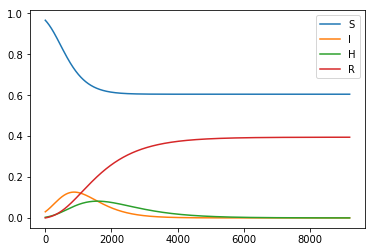

In [5]:
plt.plot(S, label = 'S')
plt.plot(I, label = 'I')
plt.plot(H, label = 'H')
plt.plot(R, label = 'R')
plt.legend()

### Importation of the data

In [6]:
import pandas as pd

In [7]:
train1 = np.array([ 172., 408. , 463.,  581.,  679.,  853.,  981., 1230., 1422., 1638., 1904., 2115.,
 2333., 2487., 2635., 2706., 2838., 2874., 2983., 3030., 2959., 2908., 2962., 2950.,
 2985., 3025., 3055., 3044., 3004., 2970., 2965., 2942., 2983., 2936., 2872., 2816.,
 2760., 2713., 2682., 2694., 2663., 2603., 2537., 2489., 2470., 2474., 2482., 2439.,
 2399., 2299., 2206.,2128., 2122., 2116.,2089., 2026., 1920., 1878., 1833., 1769.,
 1782.,1740., 1671., 1580., 1542., 1532., 1514., 1525., 1465., 1404., 1334., 1240.,
 1159., 1156., 1161., 1163., 1128., 1070.,  998.,  945.,  924.,  923.,  907., 865.,
  834.,  811.,  766.,  757.,  755.,  709.,  699.,  660.,  642.,  638.,  616.,  602.,
  595.,  581.,  571.,  553.,  543.,  525.,  525.,  505.,  503.])

train2=np.array([2841,3473,4552,4933,6329,7637,7728,12037,11341,13083,16020,14900,
                  19117,17393,22058,24346,21639,23481,22030,27282,25253,24206,26185,26187,27915,
                  24062,28435,26635,20533,27145,25520,25878,24185,23323,21666,23197,22403,26802,
                  19754,22607,24734,21932,21589,19171,21604,18962,21191,19081,19360,17464,19704,17689,
                  17652,18519,19186,14460,16119,18105,14155,14219,16033,13551,16279,13868,14906,11662,12743,
                  14041,12092,12900,12557,12246,12143,11429,11355,11572,11067,10260,9322,9968,11333,10009,9402,
                  10042,9594,8867,9095,9014,9070,9286,8679,8978,9044]                 )

N1=8000000. # total population train1
N2=60000000. # total population train2
train=train1
N=N1

### Formating the data

In [8]:
def subdiv (data, dt):
    n = int(1/dt)
    T = data.__len__()
    Hd = np.zeros(T*n)
    for i in range(T*n):
        index = int(i*dt)
        Hd[i] = data[index]
    return Hd

In [9]:
def extract (Hm, T, dt):
    He = np.zeros(T)
    n = int(1/dt)
    for i in range (T):
        He[i] = Hm[n*i]
    return He

### Cost function

In [10]:
def J(data, N, dt, c, l, g1, g2, a):
    n = int(1/dt)
    H0 = data[0]/N
    I0 = 10*H0
    S0 = 1-I0-H0
    R0 = 0
    T = data.__len__()
    H = integrate(S0, I0, H0, R0, T, dt, c, l, g1, g2, a)
    Hm = np.array(H)[2]
    He = extract(Hm, T, dt)
    Hd = np.zeros(T)
    for i in range(T):
        Hd[i] = data[i]/N
    diff = np.zeros(T)
    for i in range (T):
        diff[i] = He[i] - Hd[i]
    return (np.linalg.norm(diff)**2, Hm, He, Hd)

8.73729453682e-06


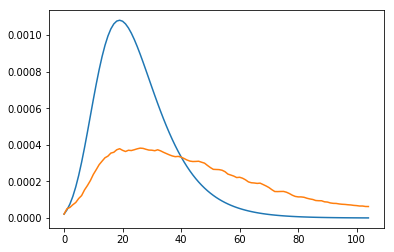

In [11]:
Jd, H, He, Hd = J(train, N, dt, c, l, g1, g2, a)
print(Jd)

plt.plot(He)
plt.plot(Hd)